In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score

dimensions de X: (2, 100)
dimensions de y: (1, 100)


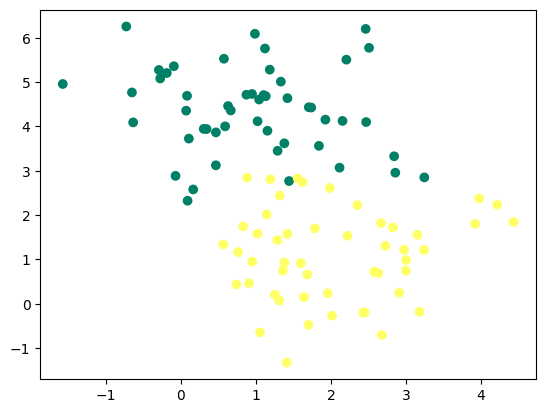

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(layers):
    params = []
    for i in range(1, len(layers)):
        params.append({
            "W": np.random.randn(layers[i], layers[i-1]),
            "b": np.random.randn(layers[i], 1),
        })
    return params

In [4]:
h_layers = [16,16]
params = initialisation([X.shape[0], *h_layers, y.shape[0]])
for i, p in enumerate(params, start=1):
    print(f"Param {i}")
    print(f"  -> Shape of W: {p['W'].shape}")
    print(f"  -> Shape of b: {p['b'].shape}")

Param 1
  -> Shape of W: (16, 2)
  -> Shape of b: (16, 1)
Param 2
  -> Shape of W: (16, 16)
  -> Shape of b: (16, 1)
Param 3
  -> Shape of W: (1, 16)
  -> Shape of b: (1, 1)


In [5]:
def forward_propagation(X, params):
    Z = params[0]["W"].dot(X) + params[0]["b"]
    activations = [1 / (1 + np.exp(-Z))]
    for p in params[1:]:
        Z = p["W"].dot(activations[-1]) + p["b"]
        activations.append(1 / (1 + np.exp(-Z)))
    return activations

In [6]:
activations = forward_propagation(X, params)
print(f"X shape: {X.shape}")
for i, A in enumerate(activations, start=1):
    print(f"A{i} shape: {A.shape}")

X shape: (2, 100)
A1 shape: (16, 100)
A2 shape: (16, 100)
A3 shape: (1, 100)


In [7]:
def log_loss(A, y):
    return (1 / len(y)) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [8]:
def back_propagation(X, y, activations, params):
    Ws = [p["W"] for p in params]

    m = y.shape[1]

    dZ = activations[-1] - y
    gradients = [{
        "dW": 1 / m * dZ.dot(activations[-2].T),
        "db": 1 / m * np.sum(dZ, axis=1, keepdims=True) 
    }]

    for i in range(len(activations) - 2, 0, -1):
        dZ = np.dot(Ws[i+1].T, dZ) * activations[i] * (1 - activations[i])
        gradients.append({
            "dW": 1 / m * dZ.dot(activations[i].T),
            "db": 1 / m * np.sum(dZ, axis=1, keepdims=True)
        })

    dZ = np.dot(Ws[1].T, dZ) * activations[0] * (1 - activations[0])
    gradients.append({
        "dW": 1 / m * dZ.dot(X.T),
        "db": 1 / m * np.sum(dZ, axis=1, keepdims=True)
    })

    gradients.reverse()
    return gradients

In [9]:
gradients = back_propagation(X, y, activations, params)
for i, g in enumerate(gradients, start=1):
    print(f"dW{i} shape: {g['dW'].shape}")
    print(f"db{i} shape: {g['db'].shape}")

dW1 shape: (16, 2)
db1 shape: (16, 1)
dW2 shape: (16, 16)
db2 shape: (16, 1)
dW3 shape: (1, 16)
db3 shape: (1, 1)


In [10]:
def update(gradients, params, learning_rate):
    # W = W - learning_rate * dW
    # b = b - learning_rate * db
    # return (W, b)

    new_params = []

    for g, p in zip(gradients, params):
        new_params.append(
            {
                "W": p["W"] - learning_rate * g["dW"],
                "b": p["b"] - learning_rate * g["db"],
            }
        )

    return new_params

In [11]:
new_params = update(gradients, params, 0.1)
for i, p in enumerate(new_params, start=1):
    print(f"Param {i}")
    print(f"  -> Shape of W: {p['W'].shape}")
    print(f"  -> Shape of b: {p['b'].shape}")

Param 1
  -> Shape of W: (16, 2)
  -> Shape of b: (16, 1)
Param 2
  -> Shape of W: (16, 16)
  -> Shape of b: (16, 1)
Param 3
  -> Shape of W: (1, 16)
  -> Shape of b: (1, 1)


In [12]:
def predict(X, params):
    activations = forward_propagation(X, params)
    return activations[-1] >= 0.5

In [13]:
def predict_proba(X, params):
    return forward_propagation(X, params)[-1]

In [14]:
def neural_network(X, y, hidden_layers=[16, 16, 16], learning_rate=0.1, n_iter=1000):
    params = initialisation([X.shape[0], *hidden_layers, y.shape[0]])

    train_loss = []
    train_acc = []

    for i in range(n_iter):
        activations = forward_propagation(X, params)
        gradients = back_propagation(X, y, activations, params)
        params = update(gradients, params, learning_rate)
        
        train_loss.append(log_loss(activations[-1], y))
        y_pred = predict(X, params)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    print(f"Final loss: {train_loss[-1]}")
    print(f"Final accuracy: {train_acc[-1]}")

    return params

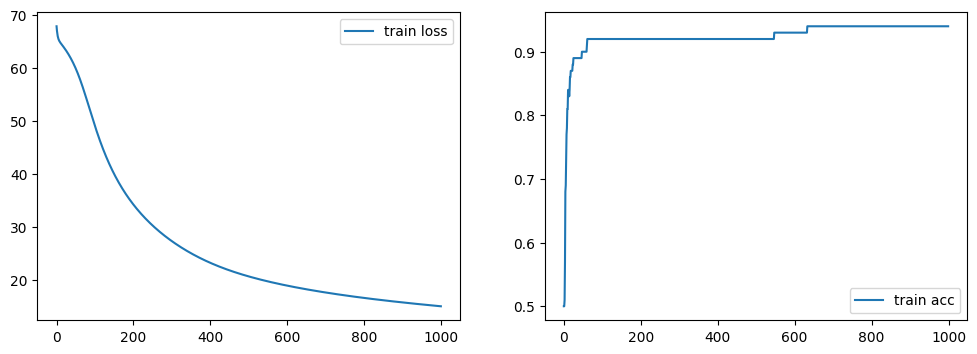

Final loss: 14.985082248542126
Final accuracy: 0.94


In [15]:
params = neural_network(X, y)

In [16]:
params

[{'W': array([[ 0.69105106, -0.88168964],
         [ 0.12466969, -1.06212698],
         [ 0.48684681, -0.78948521],
         [-0.43081759,  0.83277031],
         [-0.30520728,  0.66623433],
         [-2.33863324, -1.86134604],
         [ 0.82570238, -1.63885903],
         [ 1.55361799,  1.74446963],
         [ 2.03905874,  1.49678538],
         [-0.73961648,  0.95957166],
         [-0.55825453,  0.4938637 ],
         [ 0.1745802 ,  0.60683768],
         [ 0.8198144 ,  0.25127491],
         [-0.02415097,  0.35100425],
         [ 0.75871638,  1.03304427],
         [-0.27557659, -2.00085619]]),
  'b': array([[ 1.11593386],
         [ 2.26082991],
         [ 0.52017125],
         [-0.55417833],
         [ 0.00766185],
         [-0.0373464 ],
         [-0.10858621],
         [-0.85599693],
         [-0.5482327 ],
         [-1.03464162],
         [-0.80778907],
         [-1.48163229],
         [-1.4034946 ],
         [ 1.42340299],
         [ 0.44222922],
         [-0.28746971]])},
 {'W': ar

dimensions de Xc: (2, 100)
dimensions de yc: (1, 100)


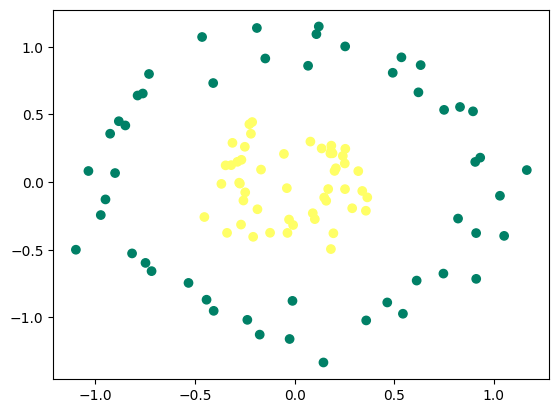

In [17]:
Xc, yc = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
Xc = Xc.T
yc = yc.reshape((1, yc.shape[0]))

print('dimensions de Xc:', Xc.shape)
print('dimensions de yc:', yc.shape)

plt.scatter(Xc[0, :], Xc[1, :], c=yc, cmap='summer')
plt.show()

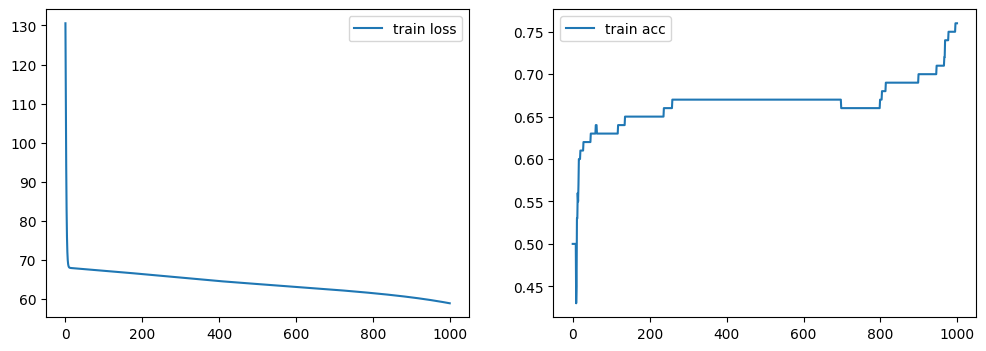

Final loss: 58.926184863984766
Final accuracy: 0.76


In [18]:
params = neural_network(Xc, yc)

In [19]:
params

[{'W': array([[ 0.12932839, -0.31588133],
         [ 0.30081304,  1.04452042],
         [ 2.37370572, -0.93913732],
         [ 0.94536973, -1.31020886],
         [-1.73736008,  0.5223341 ],
         [ 1.10293958, -0.43726002],
         [ 0.09309157, -0.92780291],
         [-1.95309966,  0.69222116],
         [-0.00919112,  1.67556549],
         [ 0.46065098,  1.63733298],
         [ 0.02453562,  0.41698685],
         [-0.78755299,  0.56838479],
         [-0.35544502, -0.14896045],
         [ 0.38951882, -0.73756517],
         [-1.91616763,  0.10699048],
         [-2.04155946,  2.88803441]]),
  'b': array([[ 1.00558783],
         [-0.11849914],
         [-0.3793504 ],
         [-0.93427563],
         [-0.91695176],
         [-0.42318176],
         [ 0.78733683],
         [-1.34642643],
         [ 1.43283797],
         [-0.17892703],
         [ 1.90845937],
         [-0.13422069],
         [ 0.91267265],
         [-1.7080055 ],
         [ 1.44534628],
         [ 1.69615364]])},
 {'W': ar

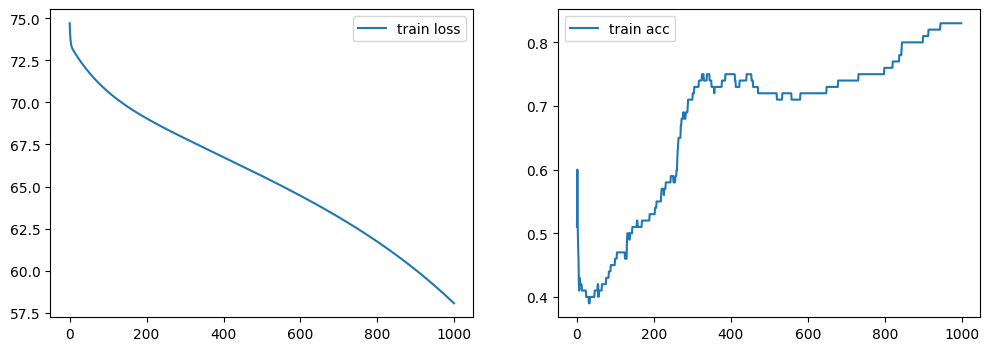

Final loss: 58.05900966710423
Final accuracy: 0.83


In [20]:
params = neural_network(Xc, yc, hidden_layers=[16, 16])

In [21]:
params

[{'W': array([[-0.07044945,  0.7636644 ],
         [-2.63664461,  0.53234191],
         [ 0.83979817, -0.15578686],
         [ 0.56669896,  1.07043838],
         [-1.92990308, -0.28961686],
         [-1.82142996, -1.60332389],
         [ 0.38238391,  2.51551781],
         [ 0.97255606,  0.99931458],
         [-0.67012074,  1.1503436 ],
         [-0.41536081, -1.16163254],
         [-0.02380313,  0.36699912],
         [-1.59650826,  0.59935229],
         [ 0.60604394,  0.90625628],
         [-0.61577517, -0.11810405],
         [-1.41745204,  0.16811926],
         [-0.74219001, -0.96169847]]),
  'b': array([[ 0.27605161],
         [-0.65447549],
         [-1.72157919],
         [ 0.5636503 ],
         [ 0.93668127],
         [-0.06963191],
         [ 1.77046833],
         [ 0.15120026],
         [-0.36017991],
         [ 0.42380102],
         [ 1.0107863 ],
         [-2.91733012],
         [-0.7955852 ],
         [ 0.31175861],
         [ 1.45760898],
         [-0.10888757]])},
 {'W': ar